# Speed vs 1-block ratio (free operation)

This code will generate a line chart showing how allocator speed performance is affected with 1-block region ratio (% of regions that are of size 1).

## Parameters

In [1]:
input_csv = 'data/speed_benchmarks.csv'

op = 'Free'
mem_usage = 50
mem_size = 134217728
use_log = False

use_log_text = 'log ' if use_log else ''
title = f"{op} performance - speed vs 1-block allocation ratio"
file = f'rendered/{op} # speed vs 1b ratio {use_log_text}# memsize {mem_size} # memusage {mem_usage}.png'

save = False

## The code

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, ScalarFormatter, LogLocator)

### Load & filter data

In [4]:
all_benchmarks = pd.read_csv(input_csv)

data = all_benchmarks[
    (all_benchmarks["Operation"] == op) &
    (all_benchmarks["Memory size"] == mem_size)].groupby('Allocator')

### Plot

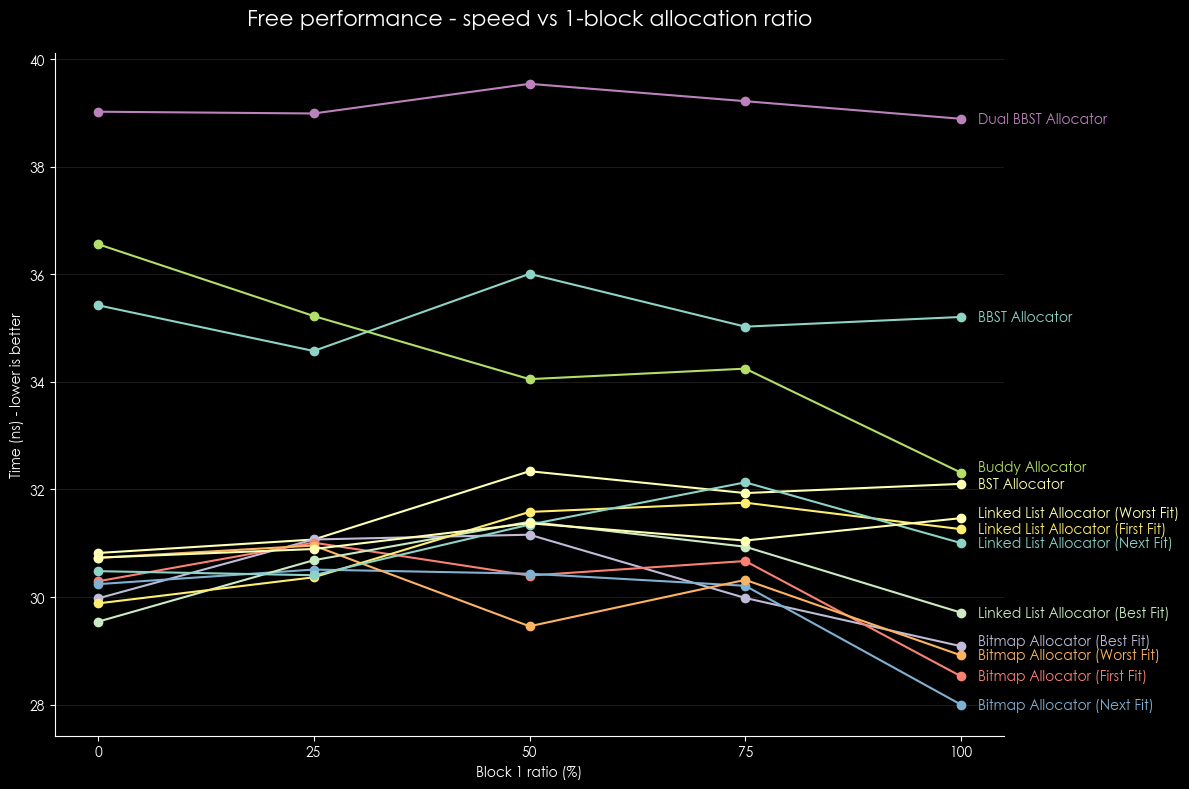

In [5]:
data_xticks = all_benchmarks['Block 1 ratio'].unique()

plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Century Gothic'
plt.figure(figsize=(12, 8))
plt.title(title, fontsize=16, pad=20)
ax = plt.subplot()

label_xoffset = 2

for group in data:
    myplot = ax.plot(group[1]['Block 1 ratio'],
                     group[1]['Average (us)'],
                     '-o',
                     label=group[0]
                    )
    #
    # Fine tune y offset of labels, so they can be read.
    # These probably need to be adjusted if the data changes
    #
    label_yoffset = 0
    if 'Bitmap Allocator (Best Fit)' in group[0]:
        label_yoffset=0.1
    elif 'Linked List Allocator (Worst Fit)' in group[0]:
        label_yoffset=0.1
    elif 'Buddy Allocator' == group[0]:
        label_yoffset=0.1
    
    max_mem_size = group[1]['Block 1 ratio'].max()
    max_row = group[1][group[1]['Block 1 ratio'] == max_mem_size]

    plt.text(label_xoffset+max_row['Block 1 ratio'].iloc[0],
             label_yoffset+max_row['Average (us)'].iloc[0],
             group[0],
             va = 'center',
             c = myplot[0].get_color())

ax.set_xlabel('Block 1 ratio (%)')
ax.set_xticks(data_xticks)
ax.set_ylabel('Time (ns) - lower is better')
if use_log:
    ax.set_yscale('log')
ax.yaxis.set_major_formatter(ScalarFormatter())
if use_log:
    ax.yaxis.set_major_locator(LogLocator(base=10, subs=(0.25,0.5,1.0), numticks=20))
    
ax.grid(True, axis='y', color='white', alpha=.1)
ax.spines[['right', 'top']].set_visible(False)
fig = plt.gcf()
fig.tight_layout()
if save:
    fig.savefig(file, transparent=True, dpi=300)
plt.show()